# L5: Custom Convnets

In [1]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd

Step 1 - Load Data

In [2]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


Step 2 - Define Model

In [3]:
model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

Step 3 - Train

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [5]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=40,
    verbose=1,
)

Epoch 1/40
80/80 [==============================] - 7s 56ms/step - loss: 0.6830 - binary_accuracy: 0.5697 - val_loss: 0.6714 - val_binary_accuracy: 0.5775
Epoch 2/40
80/80 [==============================] - 4s 45ms/step - loss: 0.6665 - binary_accuracy: 0.5953 - val_loss: 0.6577 - val_binary_accuracy: 0.6151
Epoch 3/40
80/80 [==============================] - 4s 45ms/step - loss: 0.6568 - binary_accuracy: 0.6109 - val_loss: 0.6505 - val_binary_accuracy: 0.6221
Epoch 4/40
80/80 [==============================] - 4s 46ms/step - loss: 0.6491 - binary_accuracy: 0.6209 - val_loss: 0.6430 - val_binary_accuracy: 0.6302
Epoch 5/40
80/80 [==============================] - 4s 46ms/step - loss: 0.6394 - binary_accuracy: 0.6351 - val_loss: 0.6323 - val_binary_accuracy: 0.6409
Epoch 6/40
80/80 [==============================] - 4s 47ms/step - loss: 0.6260 - binary_accuracy: 0.6527 - val_loss: 0.6228 - val_binary_accuracy: 0.6448
Epoch 7/40
80/80 [==============================] - 4s 48ms/step - los

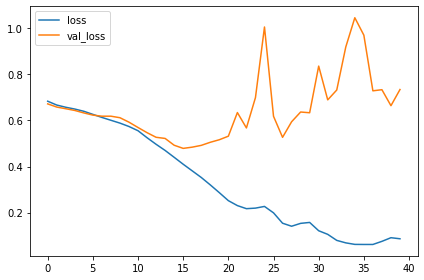

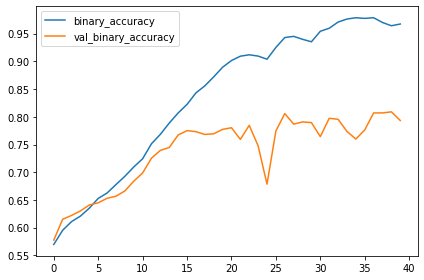

In [6]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();